<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_319to341.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**


---

**규제 선형 모델의 개요**

- 회귀모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함.
- 이전까지 선형 모델의 비용 함수는 RSS를 최소화하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려: 학습데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커짐
- 위의 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉬움
- 이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 갑시 커지지 않도록 하는 방법이 균형을 이루어야 함.


---

alpha:
- alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값ㅇㄹ 작게 해 과적합을 개선할 수 있음
- alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선 할 수 있음.


---
**규제 (Regularization)**
- alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식
- L2 방식: W의 제곱에 대해 페널티를 부여하는 방식: 릿지
- L1 방식: W의 절댓값에 대해 페널티를 부여하는 방식: 라쏘


### **릿지 회귀**

- 사이킷런의 Ridge 클래스
- Ridge 클래스의 주요 생성 파라미터는 alpha: alpha L2 규제 
- cross_val_score( )로 평가

In [ ]:
#보스턴 주택 가격 데이터 세트
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline

boston=load_boston()

bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']=boston.target

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_data,y_target, test_size=0.3, random_state=156)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE socres: ', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE socres:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE: 5.518


LinearRegression의 RMSE 평균보다 더 뛰어난 예측 성능 


---
릿지의 alpha 값을 변화 시키면서 RMSE와 회귀 계수 값의 변화 살펴보기


In [ ]:
alphas=[0, 0.1, 1, 10, 100]

for alpha in alphas :
  ridge=Ridge(alpha=alpha)
  
  neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)  
  avg_rmse=np.mean(rmse_scores)
  print('alpha {0} 일 때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE: 5.788
alpha 1 일 때 5 folds 의 평균 RMSE: 5.653
alpha 10 일 때 5 folds 의 평균 RMSE: 5.518
alpha 100 일 때 5 folds 의 평균 RMSE: 5.330


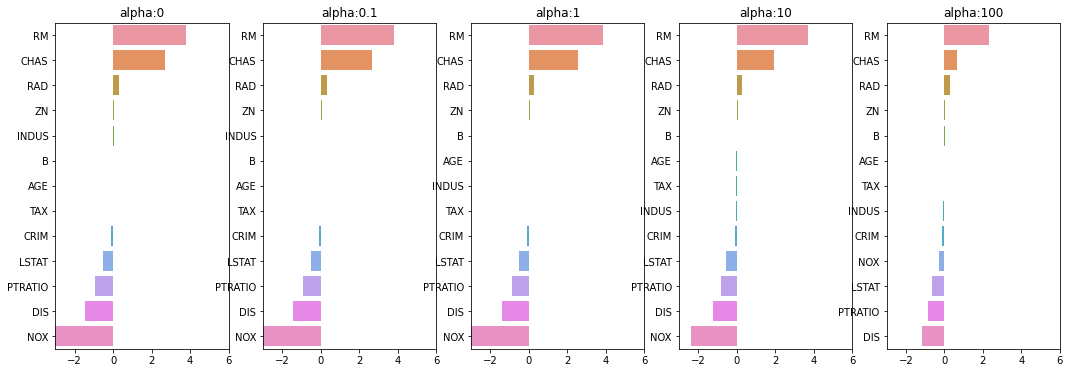

In [ ]:
fig, axs=plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df=pd.DataFrame()

for pos, alpha in enumerate(alphas):
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)

  coeff=pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname]=coeff

  coeff=coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])


plt.show()

alpha 값이 증가시킬수록 회귀 계수 값은 지속적으로 작아짐

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


**라쏘 회귀**
- W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용
- L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df=pd.DataFrame()
  if verbose: print('######', model_name, '######')
  for param in params:
    if model_name=='Ridge': model=Ridge(alpha=param)
    elif  model_name=='Lasso': model=Lasso(alpha=param)
    elif  model_name=='ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

    model.fit(X_data,y_target)

    coeff=pd.Series(data=model.coef_,index=X_data.columns)
    colname='alpha:'+str(param)
    coeff_df[colname]=coeff
  return coeff_df

In [ ]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [ ]:
#피처별 회귀 계수
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


엘라스틱넷 회귀
- L2 규제와 L1 규제를 결합한 회귀
- 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강함: alpha 값에 따라 회귀 계수의 값이 급격히 변동할 수 있음
- 이런 단점을 완화하기 위해 L2 규제를 라쏘 회귀에 추가
- 엘라스틱넷 회귀의 단점은 수행시간이 오래걸린다는 것


In [ ]:
#위의 함수에서 l1_ratio를 0.7로 고정해둔 것을 유의

elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
sort_column='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### **선형 회귀 모델을 위한 데이터 변환**

- 선형 모델은 피처와 타깃값 간에 선형의 관계가 있다고 가정하고 최적의 선형함수를 찾아내 결과값 예측
- 정규 분포 형태를 매우 선호
- 타깃값의 경우 특정값의 분포가 치우친 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 수 있음
- 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적



---
사이킷런을 이용하여 핌처 데이터 세트에 적용하는 변환 작업
1. StandardScaler 클래스를 이용해 평균이 0 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을적용하여 변환, 1번 방법을 통해 예측 성능에 향상이 없을 경우 사용
3. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포


---
- 타깃값의 경우는 일반적으로 로그 변환 적용
- 보스턴 주택가격 피처 데이터 세트에 위에서 언급한 변환을 적용 후 RMSE 측정



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method=='Standard':
    scaled_data=StandardScaler().fit_transform(input_data)
  elif method=='MinMax':
    scaled_data=MinMaxScaler().fit_transform(input_data)
  elif method=='Log':
    scaled_data=np.log1p(input_data)
  else:
    scaled_data=input_data
  
  if p_degree!=None:
    scalerd_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data

In [ ]:
alphas=[0.1,1,10,100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax',None), ('MinMax',2), ('Log',None)]
for scale_method in scale_methods:
  X_data_scaled=get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                input_data=X_data)
  print('\n## 변환 유형: {0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형: None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형: MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형: Log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:

## **07 로지스틱 회귀**

- 선형 회귀 방식을 분류에 적용한 알고리즘
- 회귀가 선형인지 여부는 독립변수가 아닌 가중치 변수가 선형인지 아닌지에 따름
- 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것

**시그모이드 함수**
- x 값이 - + 로 아무리 커져도 y 값은 0과 1 사이 값을 반환
- 이를 이용하면 0과 1에 대해 분류를 할 수 있음


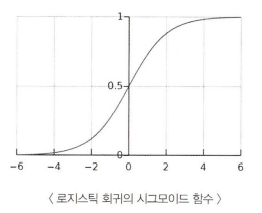

In [2]:
#위스콘신 유방암 데이터 세트를 이용하여 로지스틱 회귀로 암 여부 판단

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train,X_test, y_train, y_test=train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds=lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


- 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터: penalty와 C
-penalty는 규제의 유형을 설정: 'l2' 로 설정시 L2 규제, 기본은 L2 규제
- C는 규제 강도를 조절하는 alpha값의 역수

In [7]:
from sklearn.model_selection import GridSearchCV

params={'penalty': ['l2','l1'],
        'C':[0.01,0.1,1,1,5,10]}

grid_clf=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도: 0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

##**08 회귀 트리**

- 선형 회귀는 회귀 계순의 관계를 모두 선형으로 가정
- 일반적으로 선형 회귀는 회귀 계수를 선형으로 결합하는 회귀 함수를 구해, 여기에 독립변수를 입력해 결괏값을 예측하는 것
- 비선형 회귀는 회귀 계수의 결합이 비선형일 뿐
- 회귀 트리는 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식을 소개


---

트리 기반의 회귀는 회귀 트리를 이용
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 에측 수행
- 회귀 트리는 리프 노드에 속한 데이터 값의 평균을 구해 회귀 예측값을 계산



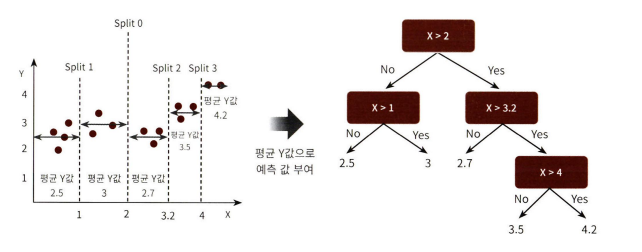

사이킷런에서는 결정 트리, 랜덤 포레스트, GBM에서 CART 기반의 회귀 수행을 할 수 있는 Estimator 클래스 제공



---

RandomForestRegressor를 이용해 앞의 선형 회귀에서 다룬 보스턴 주택 가격 예측을 수행

In [12]:
#보스턴 주택 가격 데이터 세트
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

boston=load_boston()

bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']=boston.target

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)


print('5 folds 의 개별 Negative MSE socres: ', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5 folds 의 개별 Negative MSE socres:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds 의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 folds 의 평균 RMSE: 4.423


다른 모델도 모두 사용 해보기


In [14]:
def get_modelf_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data,y_target,scoring='neg_mean_squared_error', cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('#####', model.__class__.__name__,'#####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

models=[dt_reg,rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_modelf_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
 5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
 5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
 5 교차 검증의 평균 RMSE : 4.269
[04:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
 5 교차 검증의 평균 RMSE : 4.089
##### LGBMRegressor #####
 5 교차 검증의 평균 RMSE : 4.646


- 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없음
- 대신 feature_importances_를 이용해 피처별 중요도를 알 수 있음
- feature_importances_를 이용해 보스터 주택 가격 모델의 피처별 중요도를 시각화

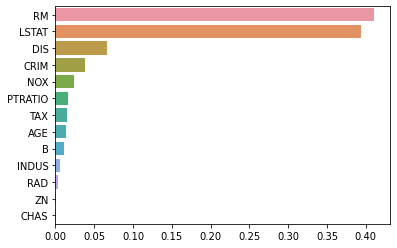

In [20]:
import seaborn as sns
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

보스턴 데이터 세트의 개수를 100개만 샘플링하고 RM과 PRICE 칼럼만 추출
- 직관적으로 예측값을 시각화

(100, 2)


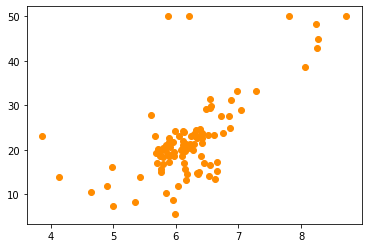

In [23]:
bostonDF_sample=bostonDF[['RM', 'PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

max_depth를 2, 7로 해서 학습

In [27]:
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

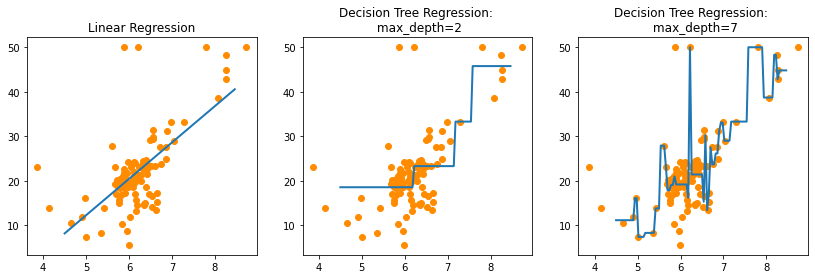

In [29]:
fig, (ax1, ax2, ax3)=plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test,pred_rf2,label='amx_depth:2',linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test,pred_rf7,label='amx_depth:7',linewidth=2)